In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table
from photutils.segmentation import SegmentationImage

In [43]:
img_name = 'nircam6'
prep_base = '../io/prep/' + img_name + '/'
sample_base = '../io/sample/' + img_name + '/'

In [44]:
pregalfit_path = prep_base + 'pregalfit.fits'
with fits.open(pregalfit_path) as hdul:
    tab_img = Table(hdul[1].data)
    tab_ini = Table(hdul[2].data)
    segm = SegmentationImage(hdul[3].data)
img_path_list = list(tab_img['img_path'])
areas = segm.areas

In [45]:
idx_pcd = np.where(tab_ini['kron_radius']>15)[0]
tab_pcd = tab_ini[idx_pcd]
tab_pcd

ID,RA,Dec,comment,KronPhot_F115W_mag,KronPhot_F150W_mag,KronPhot_F200W_mag,KronPhot_F277W_mag,KronPhot_F356W_mag,KronPhot_F410M_mag,KronPhot_F444W_mag,label,xcentroid,ycentroid,semimajor_sigma,semiminor_sigma,orientation,eccentricity,kron_radius
int64,float64,float64,str22,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
11067,214.86403889,52.81538111,0,25.02495068277892,24.81560071498985,24.507564927753915,23.226638007416977,22.644928006138358,21.719275457920823,21.486311692999543,30371,6403.010507311094,593.8649476579196,9.233361113685952,6.2009170041841735,8.814846508636217,0.740934372455153,24.597366426973384
11587,214.91397111,52.85361306,not deblended properly,19.914102591226953,19.495278034048226,19.331576912756354,19.006553549165574,19.16282696456563,19.380517960111227,19.40976974362155,29628,680.838434435028,702.600450029853,70.95601866306689,20.44879110311708,-22.257597770586614,0.9575733487133259,53.32814467215099
12699,214.90691306,52.85449694,0,17.939204563558746,17.735217561586712,17.96648046769206,18.844528579087697,18.7135612576827,18.393005227219138,18.954373039734,30810,834.202275173121,1190.5012715949256,54.802757447188235,8.42349398244239,-80.80520756627965,0.9881166784345999,73.07667042938458
16728,214.87853306,52.85558694,0,26.15220414945961,25.49979835639102,25.715814224454963,25.00697090154946,25.124817269835336,25.01956742924032,24.972920746588212,35965,2045.6833108842086,2917.964819308735,8.440767183123459,4.932107909374627,-88.6421500879775,0.8115234437381,15.3084985206118
18384,214.864405,52.85368806,0,25.21120058941791,24.751436785562717,24.668629412952477,24.354403604814777,24.178773328944395,24.280256126637568,24.075827766112784,37512,2881.708982571045,3547.2617028872805,7.947483899531026,4.8956521800832284,43.34340445860149,0.7877459455797258,15.729650016548142
35490,214.91408,52.856145,not deblended properly,15.694317341535271,15.741629420196448,16.281774477597136,16.991586049946868,17.254513885455633,16.84543792729429,17.445052426340155,29625,342.78860442245684,388.69600358443404,90.38156035372441,13.359335700317406,88.95207146592819,0.9890157137352896,94.34556939983787
35543,214.91381194,52.85686111,not deblended properly,21.381749240240243,20.94249680147601,20.872105080210225,20.428356097696938,20.273621219060182,20.081320822891392,20.075396180042986,29629,317.4578299648483,1152.3138006569,27.410557767654655,16.427752457351822,37.13361569114122,0.8005079925164081,29.708180037507287
37084,214.83360389,52.82656889,0,21.019180684517,20.825810436987723,21.17692062132914,20.685278405486237,21.107511195966254,21.438724960421553,21.498617576234345,35982,6812.454024239745,3145.5112832573977,12.73835721132955,8.396547013568657,61.25396641161669,0.7520074376353459,41.027696112202484
37865,214.88146389,52.87382111,not deblended properly,22.46893536973616,21.923063915319123,21.62865139234157,20.993536946145568,20.816318665053032,20.632098260463145,20.5899931313323,38734,238.07492734159766,4169.82364825345,9.24719855434858,7.736926424158762,-55.59907763203515,0.5476952945355484,43.738427696793536


In [46]:
import sys
sys.path.append('../')
from utils.segmentcut import cutout, SegmCut

In [47]:
img_path = '.' + img_path_list[-1]
sci_bksub = fits.getdata(img_path, 'SCI_BKSUB')
err = fits.getdata(img_path, 'ERR')

/Users/apple/opt/anaconda3/envs/galfit3/lib/python3.9/site-packages/astropy/stats/sigma_clipping.py:1026: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(data_clipped, axis=axis)
/Users/apple/opt/anaconda3/envs/galfit3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/apple/opt/anaconda3/envs/galfit3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ValueError: bkg_std is nan

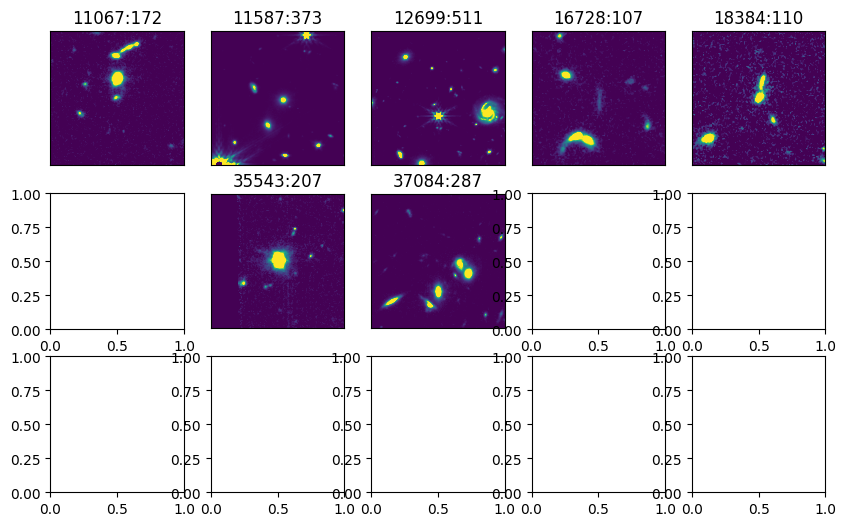

In [49]:
c = max(int(np.sqrt(len(tab_pcd)/15)),1)
a = c * 3
b = c * 5
fig, ax = plt.subplots(a, b, figsize=(10,6))
for i in range(a):
    for j in range(b):
        idx = i*b + j
        if idx==5: continue
        if idx < len(tab_pcd):
            row = tab_pcd[idx]
            x_c = row['xcentroid']
            y_c = row['ycentroid']
            size = int(7*row['kron_radius'])
            segm_cut = cutout(segm.data, x_c, y_c, size)
            sc = SegmCut(segm_cut, (x_c, y_c), size, areas, [row['label']] ,verbose=False)
            with fits.open(img_path) as hdul:
                sci_cut = cutout(sci_bksub, x_c, y_c, size)
                err_cut = cutout(err, x_c, y_c, size)
            scimap, errmap, bpmask, data1d = sc.gen_cutout(sci_cut, err_cut, hist=True)
            ax[i,j].imshow(scimap, origin='lower', vmin=np.percentile(scimap, 60), vmax=np.percentile(scimap, 99))
            ax[i,j].set_title(f'{row["ID"]}:{size}')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
y_c

3673.011190163385

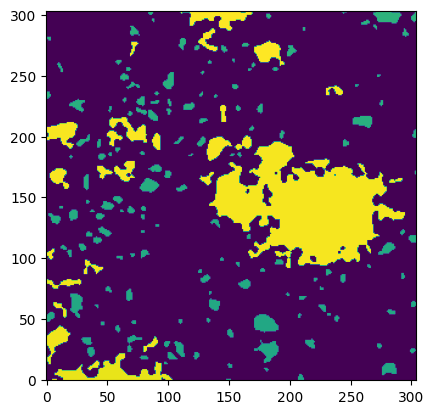

In [ ]:
plt.imshow(segm_cut, origin='lower')